# 📘 Credit Card Spending Habits in India — Data Analysis & Business Insights

### 🔍 Exploratory Data Analysis | 📊 Business Intelligence | 📈 Statistical Evaluation | 🎨 Visual Insights  
**Dataset**: [Kaggle - Analyzing Credit Card Spending Habits in India](https://www.kaggle.com/datasets/thedevastator/analyzing-credit-card-spending-habits-in-india)

---

### ✅ Sections Covered:
1. **📊 Business Insights Questions**  
2. **📈 Statistical Analysis (T-Test, ANOVA, Correlation, CI)**  
3. **🧠 Research & Evaluation (Outliers, Variance, Missing Data)**  
4. **🔎 Visual-Driven EDA (Box Plot, KDE, Heatmap, Time Series)**

---

📌 **Objective**:  
To derive actionable business and customer insights using Python, Pandas, Seaborn, and Matplotlib by analyzing credit card usage patterns, purchasing behavior, and financial trends in India.


In [261]:
# Importing libaries

import pandas as pd 
import numpy as np 

In [262]:
# Provide the correct path to your CSV file
file_path = "data/Credit card transactions - India - Simple.csv"

# Load the dataset
try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully!")
    display(df.head())  # or use df.head() in script
except FileNotFoundError:
    print("❌ File not found. Please check the file path:", file_path)
except Exception as e:
    print("⚠️ An error occurred:", str(e))

✅ Dataset loaded successfully!


,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


## Data Cleaning

In [264]:
df.set_index('index', inplace = True)
df

,City,Date,Card Type,Exp Type,Gender,Amount
index,,,,,,
0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
...,...,...,...,...,...,...
26047,"Kolkata, India",22-Jun-14,Silver,Travel,F,128191
26048,"Pune, India",3-Aug-14,Signature,Travel,M,246316
26049,"Hyderabad, India",16-Jan-15,Silver,Travel,M,265019


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       26052 non-null  object
 1   Date       26052 non-null  object
 2   Card Type  26052 non-null  object
 3   Exp Type   26052 non-null  object
 4   Gender     26052 non-null  object
 5   Amount     26052 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [266]:
# change the dtype of Date column to date time 

df['Date'] = pd.to_datetime(df['Date'], format="%d-%b-%y")  # This keeps it as datetime dtype


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26052 entries, 0 to 26051
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   City       26052 non-null  object        
 1   Date       26052 non-null  datetime64[ns]
 2   Card Type  26052 non-null  object        
 3   Exp Type   26052 non-null  object        
 4   Gender     26052 non-null  object        
 5   Amount     26052 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


In [268]:
# # make the data more understandable
# change F to (Female) amd M to (Male)abs

df['Gender'] = df['Gender'].replace('F', 'Female')
df['Gender'] = df['Gender'].replace('M', 'Male')

In [269]:
# split the city column to city and country columns

df[['City', 'Country']] = df['City'].str.split(',' , expand=True)

In [270]:
df.head()

,City,Date,Card Type,Exp Type,Gender,Amount,Country
index,,,,,,,
0,Delhi,2014-10-29,Gold,Bills,Female,82475,India
1,Greater Mumbai,2014-08-22,Platinum,Bills,Female,32555,India
2,Bengaluru,2014-08-27,Silver,Bills,Female,101738,India
3,Greater Mumbai,2014-04-12,Signature,Bills,Female,123424,India
4,Bengaluru,2015-05-05,Gold,Bills,Female,171574,India


# Exploratory Data Analysis

# 📊 Business Insights Questions

**1. What are the top 5 cities by total credit card spending?**

In [274]:
df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(5)

City
Greater Mumbai    576751476
Bengaluru         572326739
Ahmedabad         567794310
Delhi             556929212
Kolkata           115466943
Name: Amount, dtype: int64

- Objective: 🎯 Identify the most profitable markets based on total spending.

**2. Which card type generates the highest revenue overall?**

In [277]:
df.groupby('Card Type')['Amount'].sum().sort_values(ascending=False)

Card Type
Silver       1069613713
Signature    1013041105
Platinum     1007639019
Gold          984539536
Name: Amount, dtype: int64

- Objective: 🎯 Understand which credit card type is most used for large transactions.

**3. How do spending habits differ by gender?**

In [280]:
df.groupby('Gender')['Amount'].mean()

Gender
Female    161206.946637
Male      151109.145086
Name: Amount, dtype: float64

- Objective: 🎯 Compare average spending between males and females.

**4. Which expense type is the most frequently used and contributes the most to total spending?**

In [283]:
df['Exp Type'].value_counts()

Exp Type
Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: count, dtype: int64

In [284]:
df.groupby('Exp Type')['Amount'].sum().sort_values(ascending=False)

Exp Type
Bills            907072473
Food             824724009
Fuel             789135821
Entertainment    726437536
Grocery          718207923
Travel           109255611
Name: Amount, dtype: int64

- Objective: 🎯 Determine popular and high-value spending categories.

**5. What is the monthly trend in credit card spending across the dataset?**

<Axes: title={'center': 'Monthly Spending Trend'}, xlabel='Month'>

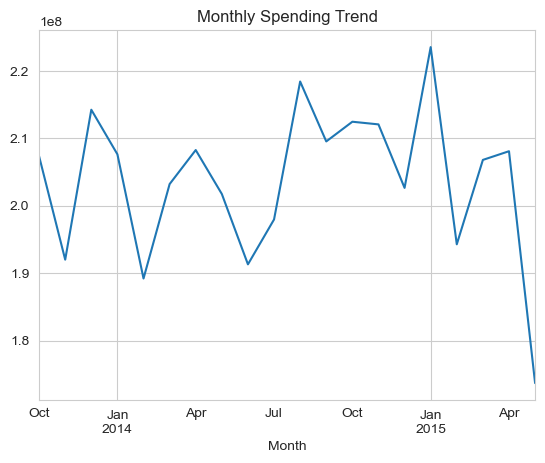

In [287]:
df['Month'] = df['Date'].dt.to_period('M')
df.groupby('Month')['Amount'].sum().plot(kind='line', title='Monthly Spending Trend')

- Objective: 🎯 Observe seasonal patterns and growth trends over time.

**6. Which city and card type combinations are most profitable?**

In [290]:
df.groupby(['City', 'Card Type'])['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

,City,Card Type,Amount
214,Bengaluru,Silver,158159090
538,Greater Mumbai,Silver,156141985
29,Ahmedabad,Silver,155304859
395,Delhi,Silver,153004428
27,Ahmedabad,Platinum,147135782
...,...,...,...
2944,Vandavasi,Signature,2098
1439,Nathdwara,Silver,1707
2128,Sadulpur,Signature,1424
400,Dhamtari,Gold,1416


🎯 Objective: Identify which City and Card Type combinations have the highest total transaction amounts.

**7. What is the average transaction value by card type and by gender?**

In [293]:
df.groupby(['Card Type', 'Gender'])['Amount'].mean().reset_index().sort_values(by='Amount', ascending = False)

,Card Type,Gender,Amount
2,Platinum,Female,163573.256150
4,Signature,Female,162709.367280
6,Silver,Female,159669.618076
0,Gold,Female,159091.020079
7,Silver,Male,152324.826867
3,Platinum,Male,151207.498411
5,Signature,Male,151034.737252
1,Gold,Male,149872.517208


🎯 Objective: Understand spending behavior across different Card Type and Gender groups.

**8. Are there certain months or seasons with noticeably higher spending?**

In [296]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

#  extract month and year:
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year

In [297]:
# check monthly spending

df.groupby(['Year', 'Month'])['Amount'].sum().reset_index().sort_values(by='Amount', ascending= False)

,Year,Month,Amount
15,2015,1,223558574
10,2014,8,218453126
2,2013,12,214267829
12,2014,10,212485915
13,2014,11,212092005
11,2014,9,209561433
6,2014,4,208284732
18,2015,4,208110002
3,2014,1,207650982
0,2013,10,207360092


**For Season-Wise**

In [299]:
def get_season(month): 
    if month in [12,1,2]: 
        return 'Winter'
    elif month in [3,4]:
        return 'Spring'
    elif month in [5,6,7,8]:
        return 'Summer'
    else: 
        return 'Autumn'

df['Seasons'] = df['Month'].apply(get_season)
df.groupby('Seasons')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

,Seasons,Amount
3,Winter,1231657595
0,Autumn,1033515408
2,Summer,983211190
1,Spring,826449180


🎯 Objective: Identify spending patterns over time to spot monthly or seasonal trends.

**9. Which countries have the highest average or total transaction values?**

In [302]:
# Total transaction value

total_by_country = df.groupby('Country')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

# Average transaction value
avg_by_country = df.groupby('Country')['Amount'].mean().reset_index().sort_values(by='Amount', ascending=False)

In [303]:
total_by_country

,Country,Amount
0,India,4074833373


In [304]:
avg_by_country

,Country,Amount
0,India,156411.537425


🎯 Objective: Compare transaction volume across countries for international insight.

**10. How does spending behavior vary between weekdays and weekends?**

In [307]:
df['Weekday'] = df['Date'].dt.day_name() 

df['Is_Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])

# Total spending comparison

df.groupby('Is_Weekend')['Amount'].sum().reset_index()

,Is_Weekend,Amount
0,False,2890375036
1,True,1184458337


In [308]:
# Average spending comparison
df.groupby('Is_Weekend')['Amount'].mean().reset_index()

,Is_Weekend,Amount
0,False,156202.714872
1,True,156923.468071


🎯 Objective: Evaluate if weekend spending is significantly different from weekday spending

# 📈 Statistical Analysis Questions

**1. Is there a statistically significant difference in average spending between male and female users?**

In [312]:
from scipy.stats import ttest_ind

male_spend = df[df['Gender'] == 'Male']['Amount']
female_spend = df[df['Gender'] == 'Female']['Amount']

t_stat, p_value = ttest_ind(male_spend, female_spend, equal_var=False)
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

T-Statistic: -8.0213, P-Value: 0.0000


Hence,  p_value < 0.05 so the difference is statistically significant.

🎯 Objective: Use an independent t-test to determine if gender impacts spending.

**2. Does the mean spending amount vary significantly between different card types?**

In [316]:
from scipy.stats import f_oneway

groups = [x['Amount'].values for _,x in df.groupby('Card Type')] 

f_stat, p_value = f_oneway(*groups)

print(f"F-Statistic: {f_stat:.4f}, P-Value: {p_value:.4f}")

F-Statistic: 0.9735, P-Value: 0.4041


✅ Here p_value > 0.05, the card type has no significantly different mean.

🎯 Objective: Use ANOVA to test mean differences across Card Type.

In [319]:

from scipy.stats import f_oneway

# STEP 1: Convert 'Date' column to datetime (optional, if needed)
df['Date'] = pd.to_datetime(df['Date'])

# STEP 2: Group by 'Card Type' and collect 'Amount' values
groups = []

for _, group in df.groupby('Card Type'):
    amounts = group['Amount'].values
    groups.append(amounts)

# STEP 3: Apply One-Way ANOVA
f_stat, p_value = f_oneway(*groups)

# STEP 4: Display the results
print(f"F-Statistic: {f_stat:.4f}, P-Value: {p_value:.4f}")

# STEP 5: Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Statistically significant: At least one card type differs in average spending.")
else:
    print("❌ Not statistically significant: No strong evidence of difference among card types.")


F-Statistic: 0.9735, P-Value: 0.4041
❌ Not statistically significant: No strong evidence of difference among card types.


**3. Can we be 95% confident that average daily spending in major cities exceeds ₹X?**

In [321]:
from scipy.stats import sem, t
df['Date'] = pd.to_datetime(df['Date'])
daily_city_spend = df.groupby(['City', 'Date'])['Amount'].sum().reset_index()

# Choose a major city like Delhi
city = 'Delhi'
delhi_spend = daily_city_spend[daily_city_spend['City'] == city]['Amount']

mean_val = delhi_spend.mean()

conf_int = t.interval(
    0.95,                         # 95% confidence level
    len(delhi_spend) - 1,         # degrees of freedom (n-1)
    loc=mean_val,                 # sample mean
    scale=sem(delhi_spend)        # standard error of the mean = sem
)

In [322]:
conf_int

(889838.3727204934, 966592.3339461734)

In [323]:
print(f"95% CI for average daily spending in {city}: ₹{conf_int[0]:.2f} to ₹{conf_int[1]:.2f}")


95% CI for average daily spending in Delhi: ₹889838.37 to ₹966592.33


In [324]:
from scipy.stats import sem, t
import pandas as pd

# Sample setup
df['Date'] = pd.to_datetime(df['Date'])
daily_city_spend = df.groupby(['City', 'Date'])['Amount'].sum().reset_index()

city = 'Delhi'
X = 3026951  # Benchmark value

# Extract data
delhi_spend = daily_city_spend[daily_city_spend['City'] == city]['Amount']
mean_val = delhi_spend.mean()
conf_int = t.interval(0.95, len(delhi_spend)-1, loc=mean_val, scale=sem(delhi_spend))

print(f"95% CI for average daily spending in {city}: ₹{conf_int[0]:.2f} to ₹{conf_int[1]:.2f}")
if conf_int[0] > X:
    print(f"✅ Yes, 95% confidence that average daily spending in {city} exceeds ₹{X}.")
else:
    print(f"❌ No, cannot be 95% confident that average daily spending in {city} exceeds ₹{X}.")


95% CI for average daily spending in Delhi: ₹889838.37 to ₹966592.33
❌ No, cannot be 95% confident that average daily spending in Delhi exceeds ₹3026951.


🎯 Objective: Use 95% confidence intervals for mean daily spending per city.

**4. Is there a strong correlation between expense type and spending value?**

In [327]:
from scipy.stats import kruskal

exp_groups = [x['Amount'].values for _,x in df.groupby('Exp Type')]

h_stat, p_value = kruskal(*exp_groups)

print(f'H_Statistics: {h_stat:.4f}, P_Value: {p_value:.4f}')

H_Statistics: 32.9576, P_Value: 0.0000


✅ Significant correlation as p_value < 0.05

In [329]:

from scipy.stats import kruskal

# STEP 1: Convert 'Date' column to datetime (optional if already done)
df['Date'] = pd.to_datetime(df['Date'])

# STEP 2: Group by 'Exp Type' and extract 'Amount' values
exp_groups = []

for _, group in df.groupby('Exp Type'):
    amounts = group['Amount'].values
    exp_groups.append(amounts)

# STEP 3: Apply Kruskal-Wallis H-test
h_stat, p_value = kruskal(*exp_groups)

# STEP 4: Display results
print(f'H_Statistics: {h_stat:.4f}, P_Value: {p_value:.4f}')

# STEP 5: Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Statistically significant: At least one expense type differs in spending.")
else:
    print("❌ Not statistically significant: No strong evidence of difference among expense types.")


H_Statistics: 32.9576, P_Value: 0.0000
✅ Statistically significant: At least one expense type differs in spending.


**5. Is there a greater variation in spending in urban cities compared to rural/smaller ones?**

In [331]:
from scipy.stats import levene

# Step 1: Define urban cities
urban = ['Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Chennai']

# Step 2: Create a new column classifying city types
df['City_Type'] = df['City'].apply(lambda x: 'Urban' if x in urban else 'Rural')

# Step 3: Split the 'Amount' values based on city type
urban_amount = df[df['City_Type'] == 'Urban']['Amount']
rural_amount = df[df['City_Type'] == 'Rural']['Amount']

# Step 4: Apply Levene’s Test to compare variances
stat, p_value = levene(urban_amount, rural_amount)

# Step 5: Print results
print(f"Levene’s Test: Stat={stat:.4f}, P-Value={p_value:.4f}")

# Step 6: Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Statistically significant: Variance in spending differs between urban and rural cities.")
else:
    print("❌ Not statistically significant: No strong evidence of variance difference.")


Levene’s Test: Stat=2.6363, P-Value=0.1045
❌ Not statistically significant: No strong evidence of variance difference.


🎯 Objective: Compare variances using Levene’s test or std dev.

**6. Does gender influence the choice of card type or expense category significantly?**

This is a classic categorical vs categorical relationship — and the right statistical test for this is the Chi-Square Test of Independence.

- To determine if there is a statistically significant association between:

- Gender and Card Type

- Gender and Expense Category (Exp Type)

- 🧪 Appropriate Test:
- Chi-Square Test of Independence (scipy.stats.chi2_contingency)

- Tests whether two categorical variables are independent.

- Null Hypothesis (H₀): Gender and Card Type / Exp Type are independent (no influence).

- Alternative Hypothesis (H₁): They are associated (gender influences the choice).



In [336]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1️⃣ Gender vs Card Type
gender_card_table = pd.crosstab(df['Gender'], df['Card Type'])

chi2_1, p_1, dof_1, ex_1 = chi2_contingency(gender_card_table)

print("📊 Gender vs Card Type")
print(gender_card_table)
print(f"Chi2 Stat: {chi2_1:.4f}, P-Value: {p_1:.4f}")

if p_1 < 0.05:
    print("✅ Statistically significant: Gender influences Card Type choice.\n")
else:
    print("❌ Not statistically significant: No strong evidence that Gender influences Card Type.\n")


# 2️⃣ Gender vs Expense Type
gender_exp_table = pd.crosstab(df['Gender'], df['Exp Type'])

chi2_2, p_2, dof_2, ex_2 = chi2_contingency(gender_exp_table)

print("📊 Gender vs Expense Type")
print(gender_exp_table)
print(f"Chi2 Stat: {chi2_2:.4f}, P-Value: {p_2:.4f}")

if p_2 < 0.05:
    print("✅ Statistically significant: Gender influences Expense Type choice.")
else:
    print("❌ Not statistically significant: No strong evidence that Gender influences Expense Type.")


📊 Gender vs Card Type
Card Type  Gold  Platinum  Signature  Silver
Gender                                      
Female     3287      3252       3368    3773
Male       3080      3146       3079    3067
Chi2 Stat: 28.7131, P-Value: 0.0000
✅ Statistically significant: Gender influences Card Type choice.

📊 Gender vs Expense Type
Exp Type  Bills  Entertainment  Food  Fuel  Grocery  Travel
Gender                                                     
Female     2860           2384  3012  2617     2428     379
Male       2218           2378  2451  2640     2326     359
Chi2 Stat: 76.1356, P-Value: 0.0000
✅ Statistically significant: Gender influences Expense Type choice.


**7. Is there a normal distribution of spending across all cities or for certain expense types?**

- 🧪 What is the Shapiro-Wilk Test?
- Purpose: Test if a sample comes from a normal distribution.

- Null hypothesis (H₀): Data is normally distributed.

- Alternative hypothesis (H₁): Data is not normally distributed.

-❗ Best used for small samples (typically ≤ 5000; ideally < 500).

In [339]:
from scipy.stats import shapiro

# Sample 500 records from 'Amount' (recommended for Shapiro test)
sample_amount = df['Amount'].sample(500, random_state=42)

# Perform Shapiro-Wilk test
stat, p_value = shapiro(sample_amount)

# Output result
print(f"Shapiro-Wilk Test (All Cities): Stat={stat:.4f}, P-Value={p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("❌ Spending across all cities is NOT normally distributed.")
else:
    print("✅ Spending across all cities is approximately normally distributed.")

Shapiro-Wilk Test (All Cities): Stat=0.8654, P-Value=0.0000
❌ Spending across all cities is NOT normally distributed.


🎯 Objective: Use Shapiro-Wilk or normality plots for distribution testing.

**8. Is the average spending significantly different on weekends vs weekdays?**

- This is a classic comparison of means between two groups, so the correct test is:

- ✅ Independent Two-Sample t-test (Welch’s t-test)

Null Hypothesis (H₀):
- There is no significant difference in average spending between weekends and weekdays.

Alternative Hypothesis (H₁):

- There is a significant difference in average spending.

In [343]:
from scipy.stats import ttest_ind

# Convert 'Date' to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract weekday names
df['Weekday'] = df['Date'].dt.day_name()

# Flag weekend vs weekday
df['Is_Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])

# Split spending into two groups
weekend_spend = df[df['Is_Weekend']]['Amount']
weekday_spend = df[~df['Is_Weekend']]['Amount']

# Perform Welch's t-test (assumes unequal variances)
t_stat, p_value = ttest_ind(weekend_spend, weekday_spend, equal_var=False)

# Print result
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ Statistically significant: Average spending differs between weekends and weekdays.")
else:
    print("❌ Not statistically significant: No strong evidence of difference in average spending.")


T-Statistic: 0.5062, P-Value: 0.6127
❌ Not statistically significant: No strong evidence of difference in average spending.


🎯 Objective: Use a t-test between weekend and weekday spending.

# 🧠 Detailed Research & Evaluation Questions

**1. Are there outliers in transaction amounts that might indicate fraud or errors?**

🎯 Objective: Detect unusually high/low values in the Amount column using the IQR method.

In [348]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)

IQR = Q3 - Q1 

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR 

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")

Number of outliers: 229


<Axes: xlabel='Amount'>

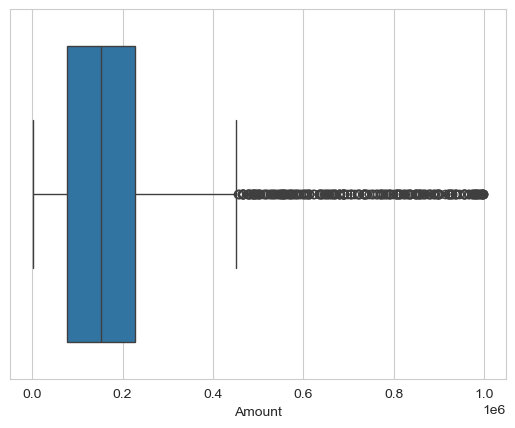

In [349]:
import seaborn as sns
sns.boxplot(x=df['Amount'])


**2. Which cities consistently show high or low spending patterns regardless of card type?**

🎯 Objective: Normalize spending by card type per city and calculate average.

In [352]:
city_spending = df.groupby(['City', 'Card Type'])['Amount'].mean().reset_index()

In [353]:
city_spending

,City,Card Type,Amount
0,Achalpur,Gold,169998.0
1,Achalpur,Platinum,178612.0
2,Achalpur,Signature,182335.0
3,Achalpur,Silver,201032.0
4,Adilabad,Gold,49020.0
...,...,...,...
3099,Zira,Signature,218424.0
3100,Zira,Silver,98224.0
3101,Zirakpur,Platinum,183221.0
3102,Zunheboto,Signature,89271.0


In [354]:
overall = city_spending.groupby('City')['Amount'].mean().reset_index().sort_values(by='Amount', ascending = False)

In [355]:
overall

,City,Amount
862,Thodupuzha,296684.000000
422,Nahan,268803.833333
19,Alwar,263488.666667
655,Rewari,259317.833333
348,Manendragarh,257140.500000
...,...,...
858,Thiruvalla,27841.333333
881,Tirur,26094.000000
317,Mahbubnagar,15458.000000
152,Fazilka,14949.000000


**3. Are certain card types used predominantly in specific countries or cities?**

🎯 Objective: Use proportions of card type per country/city.

In [358]:
card_city = df.groupby(['City', 'Card Type']).size().reset_index(name='count')
card_city['percent'] = card_city.groupby('City')['count'].transform(lambda x: x / x.sum() * 100)
dominant_card_by_city = card_city.sort_values(by=['City','percent'], ascending=False)
dominant_card_by_city

,City,Card Type,count,percent
3103,Zunheboto,Silver,2,66.666667
3102,Zunheboto,Signature,1,33.333333
3101,Zirakpur,Platinum,3,100.000000
3098,Zira,Platinum,4,44.444444
3097,Zira,Gold,3,33.333333
...,...,...,...,...
7,Adilabad,Silver,1,10.000000
0,Achalpur,Gold,4,44.444444
2,Achalpur,Signature,3,33.333333
1,Achalpur,Platinum,1,11.111111


**4. Is there any data drift over time, where the usage of certain card types or expense types increases or decreases?**

🎯 Objective: Plot monthly trends for card/expense types.

In [361]:
df['Month_Year'] = df['Date'].dt.to_period('M')
card_trend = df.groupby(['Month_Year', 'Card Type']).size().unstack().fillna(0)
exp_trend = df.groupby(['Month_Year', 'Exp Type']).size().unstack().fillna(0)

<Axes: title={'center': 'Monthly Card Type Usage Trend'}, xlabel='Month_Year'>

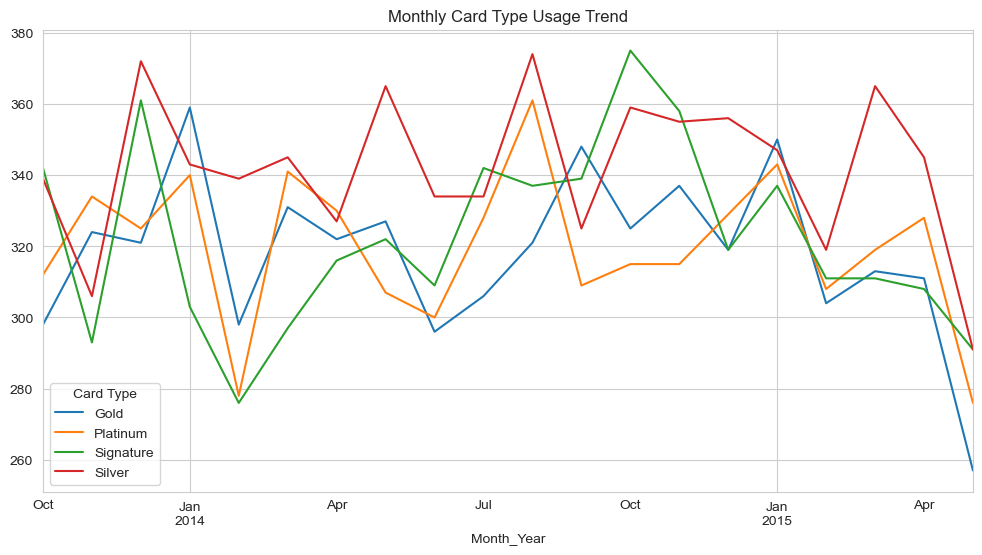

In [362]:
card_trend.plot(title='Monthly Card Type Usage Trend', figsize=(12,6))

<Axes: title={'center': 'Monthly Exp Type Usage Trend'}, xlabel='Month_Year'>

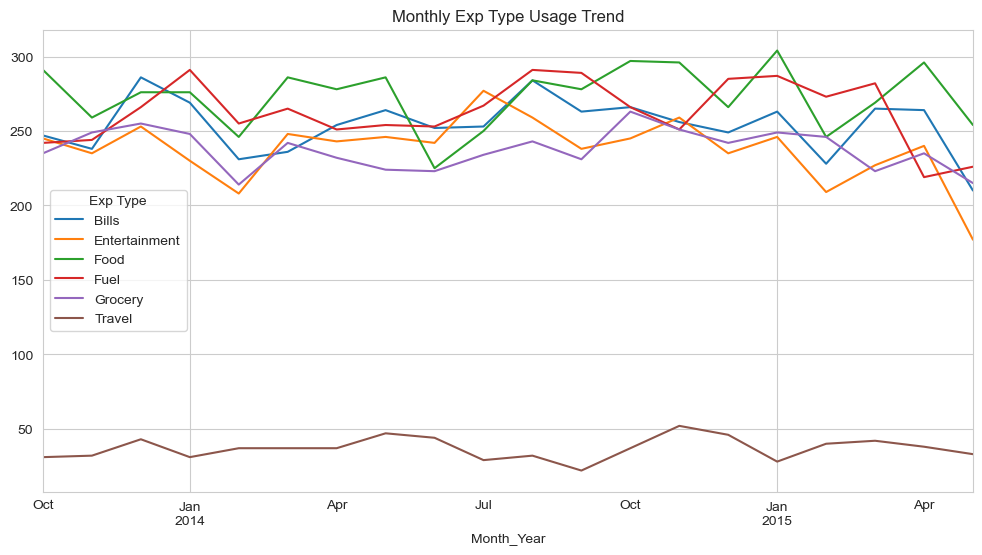

In [363]:
exp_trend.plot(title='Monthly Exp Type Usage Trend', figsize=(12,6))

**5. Are there expense types with unusually high average spending?**

🎯 Objective: Compare means and detect top expense types.

In [366]:
df.groupby('Exp Type')['Amount'].mean().reset_index().sort_values(by='Amount', ascending= False)

,Exp Type,Amount
0,Bills,178627.899370
1,Entertainment,152548.831583
4,Grocery,151074.447413
2,Food,150965.405272
3,Fuel,150111.436371
5,Travel,148042.833333


<Axes: xlabel='Exp Type', ylabel='Amount'>

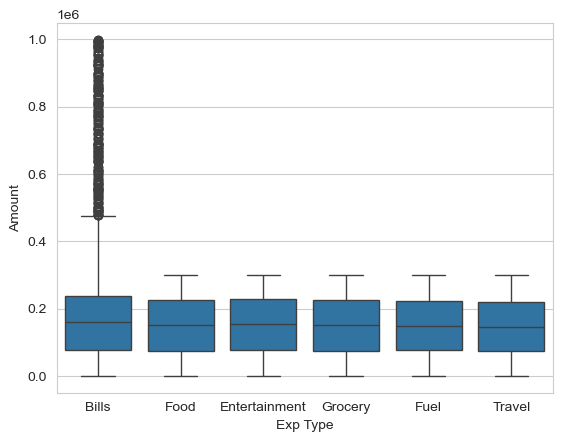

In [367]:
sns.boxplot(data=df, x='Exp Type', y='Amount')


**6. Are there gender-specific preferences for certain expense types or card types?**

🎯 Objective: Use percentage breakdowns and chi-square test.

In [370]:
gender_pref = pd.crosstab(df['Gender'], df['Exp Type'], normalize= 'index') * 100
gender_card = pd.crosstab(df['Gender'], df['Card Type'], normalize= 'index') * 100

In [371]:
from scipy.stats import chi2_contingency
chi2, p, _, _ = chi2_contingency(pd.crosstab(df['Gender'], df['Exp Type']))
print(f"Chi-Square Test (Exp Type vs Gender) p-value: {p:.4f}")


Chi-Square Test (Exp Type vs Gender) p-value: 0.0000


**7. Are there any missing values or anomalies in the data? How should they be handled?**

🎯 Objective: Check missing/null values and data inconsistencies.

In [374]:
print(df.isnull().sum())

# Check unique values
for col in df.columns:
    print(f"{col}: {df[col].unique()[:5]}")


City          0
Date          0
Card Type     0
Exp Type      0
Gender        0
Amount        0
Country       0
Month         0
Year          0
Seasons       0
Weekday       0
Is_Weekend    0
City_Type     0
Month_Year    0
dtype: int64
City: ['Delhi' 'Greater Mumbai' 'Bengaluru' 'Ahmedabad' 'Markapur']
Date: <DatetimeArray>
['2014-10-29 00:00:00', '2014-08-22 00:00:00', '2014-08-27 00:00:00',
 '2014-04-12 00:00:00', '2015-05-05 00:00:00']
Length: 5, dtype: datetime64[ns]
Card Type: ['Gold' 'Platinum' 'Silver' 'Signature']
Exp Type: ['Bills' 'Food' 'Entertainment' 'Grocery' 'Fuel']
Gender: ['Female' 'Male']
Amount: [ 82475  32555 101738 123424 171574]
Country: [' India']
Month: [10  8  4  5  9]
Year: [2014 2015 2013]
Seasons: ['Autumn' 'Summer' 'Spring' 'Winter']
Weekday: ['Wednesday' 'Friday' 'Saturday' 'Tuesday' 'Monday']
Is_Weekend: [False  True]
City_Type: ['Urban' 'Rural']
Month_Year: <PeriodArray>
['2014-10', '2014-08', '2014-04', '2015-05', '2014-09']
Length: 5, dtype: period[M]

**8. Which days of the month see unusually high spending?**

🎯 Objective: Group by day of month.

In [377]:
df['Day'] = df['Date'].dt.day
df.groupby('Day')['Amount'].sum().reset_index().sort_values(by='Amount', ascending = False)

,Day,Amount
6,7,153558972
5,6,144202892
14,15,143662118
10,11,143112226
25,26,140320346
17,18,138895307
11,12,137628822
20,21,136072767
1,2,135942487
26,27,135584889


<Axes: xlabel='Day', ylabel='Amount'>

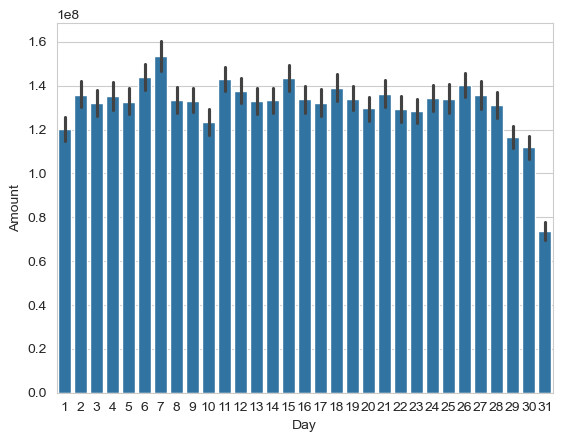

In [378]:
sns.barplot(data=df, x='Day', y='Amount', estimator='sum')


**9. Are some cities associated with only one type of expense or card type?**

🎯 Objective: Count unique categories per city.

In [381]:
card_unique = df.groupby('City')['Card Type'].nunique().reset_index()
exp_unique = df.groupby('City')['Exp Type'].nunique().reset_index()

exclusive_card = card_unique[card_unique['Card Type'] == 1]
exclusive_exp = exp_unique[exp_unique['Exp Type'] == 1]

In [382]:
exclusive_card

,City,Card Type
7,Agra,1
17,Alirajpur,1
33,Anjar,1
49,Bagaha,1
59,Bapatla,1
104,Chandausi,1
105,Chandigarh,1
106,Changanassery,1
152,Fazilka,1
165,Godhra,1


In [383]:
exclusive_exp

,City,Exp Type
17,Alirajpur,1
49,Bagaha,1
103,Chalakudy,1
105,Chandigarh,1
106,Changanassery,1
152,Fazilka,1
153,Firozabad,1
165,Godhra,1
192,Hugli-Chinsurah,1
289,Lal Gopalganj Nindaura,1


**10. Are high-spending events clustered around specific dates (e.g., festive seasons)?**

🎯 Objective: Identify top spending days.

In [386]:
daily_spend = df.groupby('Date')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)


In [387]:
df[df['Date'].dt.strftime('%m-%d').isin(['10-25', '12-25'])].groupby('Date')['Amount'].sum().reset_index()

,Date,Amount
0,2013-10-25,7843219
1,2013-12-25,6904027
2,2014-10-25,5189447
3,2014-12-25,7707970


# 🔎 Visual-Driven EDA Questions

**1. Can we create a box plot to compare `Amount` by `Card Type` or `Gender` to detect outliers?**

🎯 Objective: Detect outliers and spending variation across card types and genders.

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

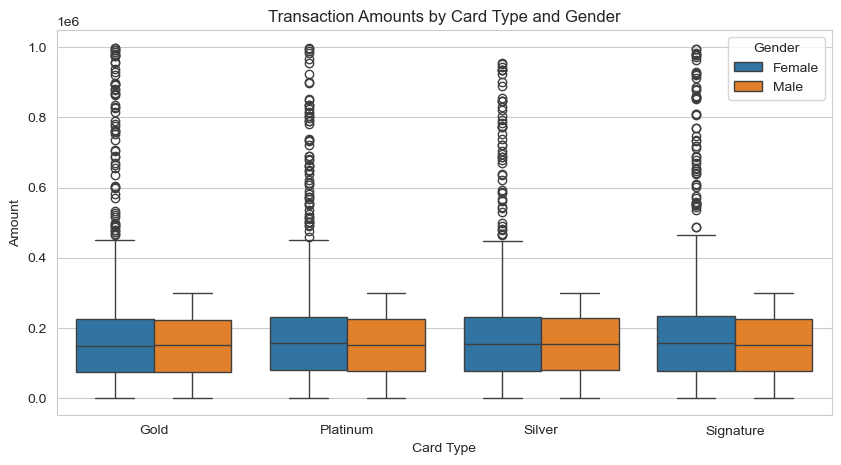

In [392]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x= 'Card Type', y= 'Amount', hue= 'Gender')
plt.title("Transaction Amounts by Card Type and Gender")
plt.show()

**2. Can we build a heatmap to explore correlation between numeric features like `Amount`?**

🎯 Objective: Examine relationships (e.g., high amounts over time if you engineer more features like day, hour, etc.)

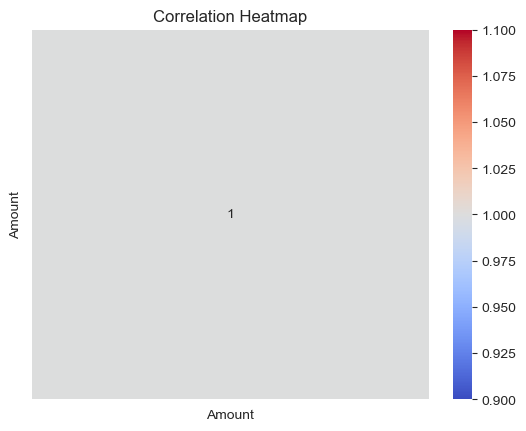

In [395]:
corr = df[['Amount']].corr()  # Add other engineered numeric columns if available
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**3. Should we plot a bar chart of total spending by `City`, `Card Type`, and `Exp Type`?**

🎯 Objective: Spot top-spending groups by each categorical dimension.

<Axes: title={'center': 'Total Spending by Top Cities'}, xlabel='City'>

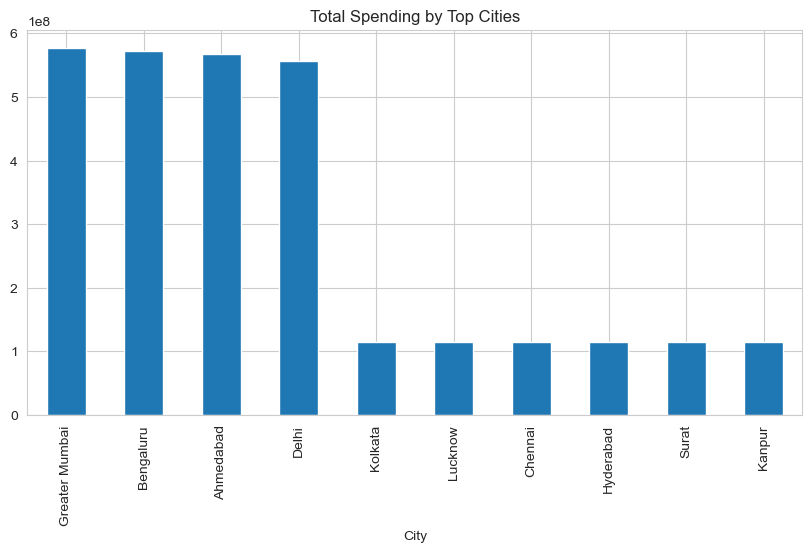

In [398]:
top_cities = df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(10)

top_cities.plot(kind='bar', figsize=(10,5), title="Total Spending by Top Cities")

**Total Spending by Card Type**

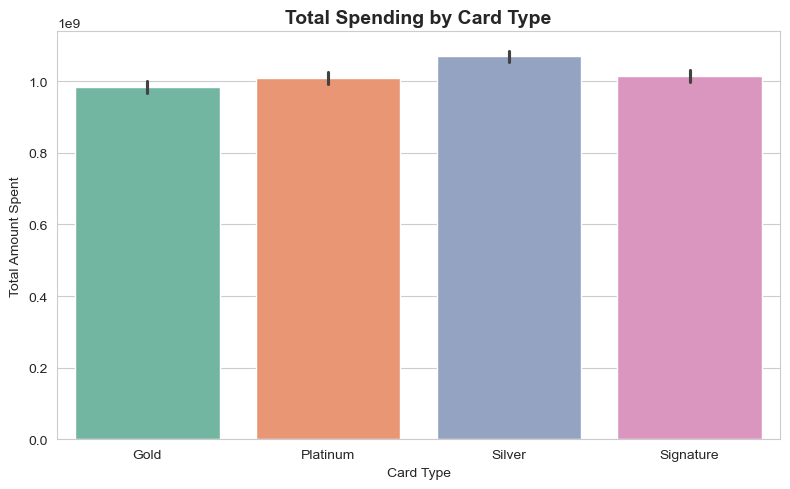

In [400]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")  # cleaner background

sns.barplot(
    data=df,
    x='Card Type',
    y='Amount',
    hue='Card Type',        # 👈 use x as hue
    estimator='sum',
    palette='Set2',
    legend=False            # 👈 hide legend since it's redundant
)


plt.title("Total Spending by Card Type", fontsize=14, weight='bold')
plt.xlabel("Card Type")
plt.ylabel("Total Amount Spent")
plt.tight_layout()
plt.show()

**Total Spending by Expense Type**

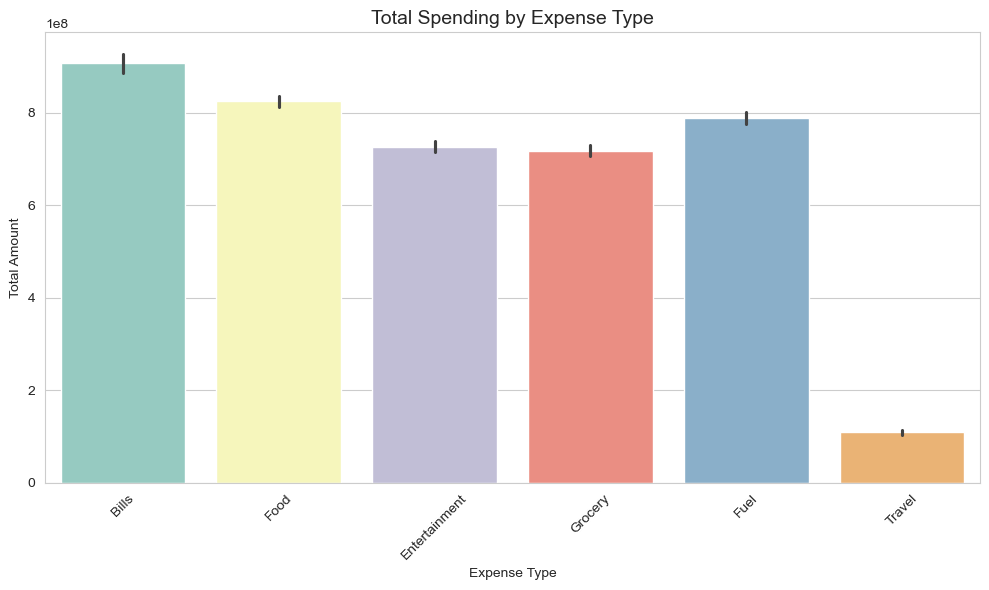

In [402]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.barplot(
    data=df,
    x='Exp Type',
    y='Amount',
    hue='Exp Type',
    estimator='sum',
    palette='Set3',
    legend=False
)

plt.title("Total Spending by Expense Type", fontsize=14)
plt.xlabel("Expense Type")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4. What does a violin plot reveal about the distribution of spending by gender and card type?**


🎯 Objective: Show full distribution shape + density + outliers.

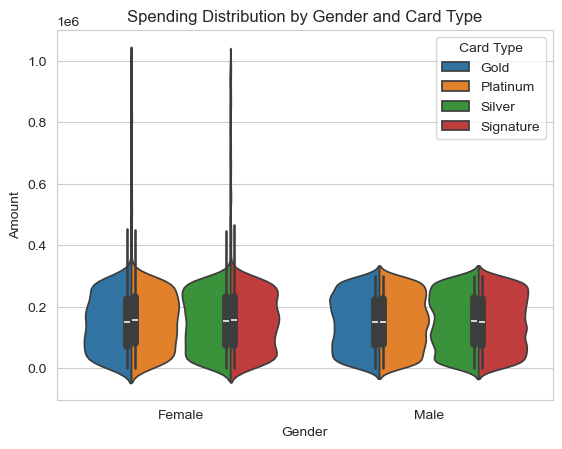

In [482]:
sns.violinplot(data=df, x='Gender', y='Amount', hue='Card Type', split=True)
plt.title("Spending Distribution by Gender and Card Type")
plt.show()


**5. Can we use a calendar heatmap to visualize spending activity over the year?**


🎯 Objective: Highlight active/inactive dates visually.

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


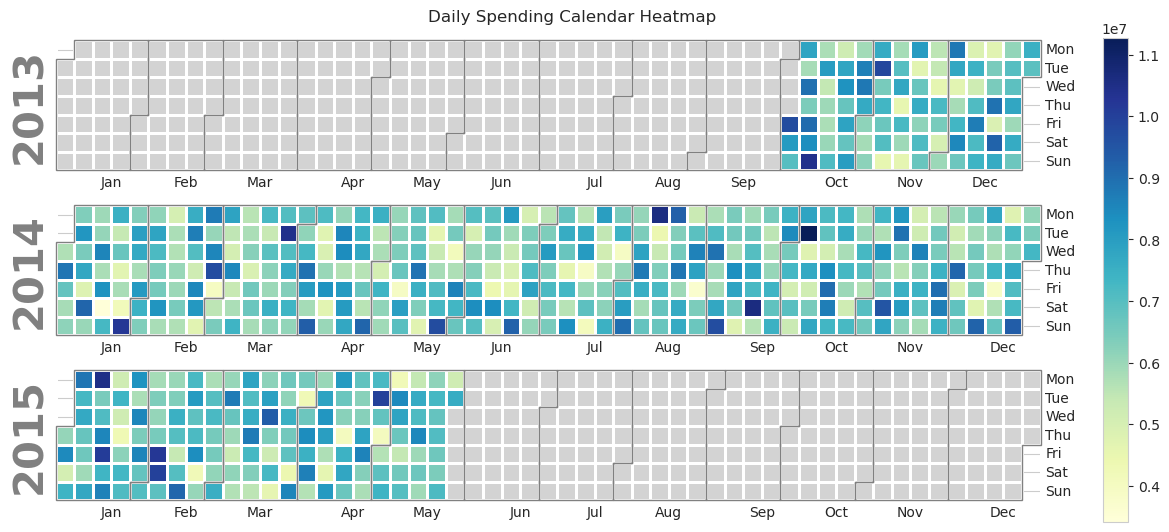

In [529]:
import matplotlib as mpl
# Set safe default font
mpl.rcParams['font.family'] = 'DejaVu Sans'  # Or 'Arial', 'Segoe UI'

# Clean column names and parse date
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Group by date for daily spending
df_reset = df.reset_index(drop=True)
daily_spend = df_reset.groupby('Date')['Amount'].sum()

# Plot calendar heatmap without emoji
calplot.calplot(
    daily_spend,
    cmap='YlGnBu',
    fillcolor='lightgray',
    suptitle='Daily Spending Calendar Heatmap',
    colorbar=True,
    how='sum'
)

plt.show()

**6. Should we use a stacked bar plot to analyze the distribution of card types across cities?**


🎯 Objective: Show composition of card types within each city.

Text(0, 0.5, 'Transaction Count')

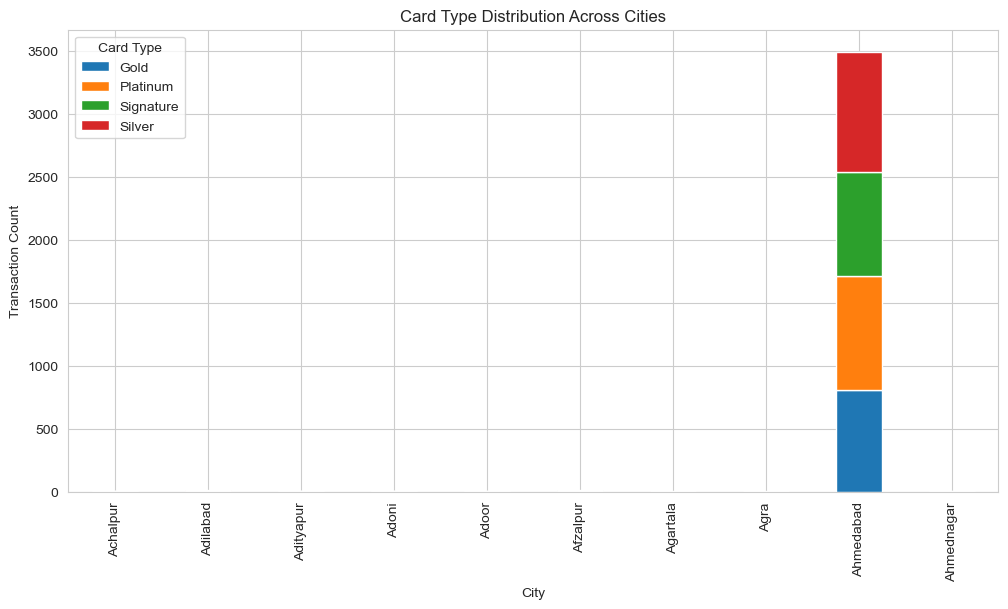

In [503]:
card_city = df.groupby(['City','Card Type']).size().unstack(fill_value=0)
card_city.head(10).plot(kind='bar', stacked = True,  figsize=(12,6))
plt.title("Card Type Distribution Across Cities")
plt.ylabel("Transaction Count")

**7. Can we create a pie chart showing the proportion of spending by `Exp Type`?**


Text(0, 0.5, '')

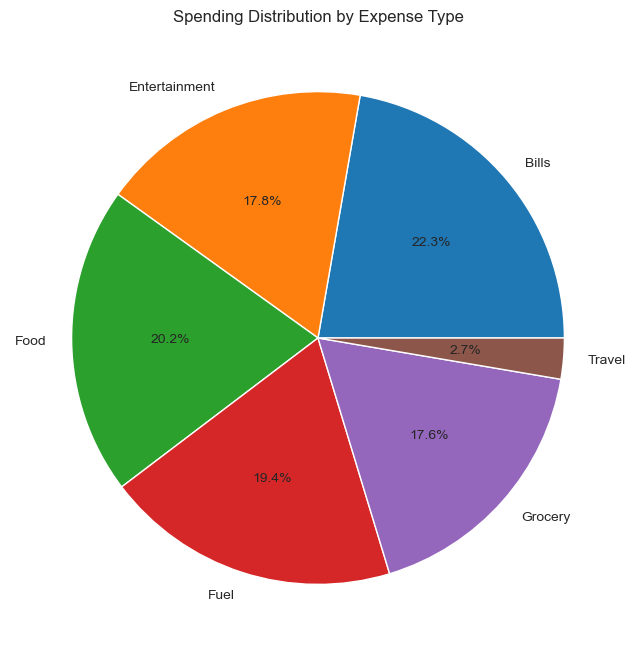

In [505]:
exp_total = df.groupby('Exp Type')['Amount'].sum()
exp_total.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), title='Spending Distribution by Expense Type')
plt.ylabel('')

**8. Can a bar chart help us compare average spend on weekdays vs weekends?**


🎯 Objective: Compare behavioral patterns on different days.

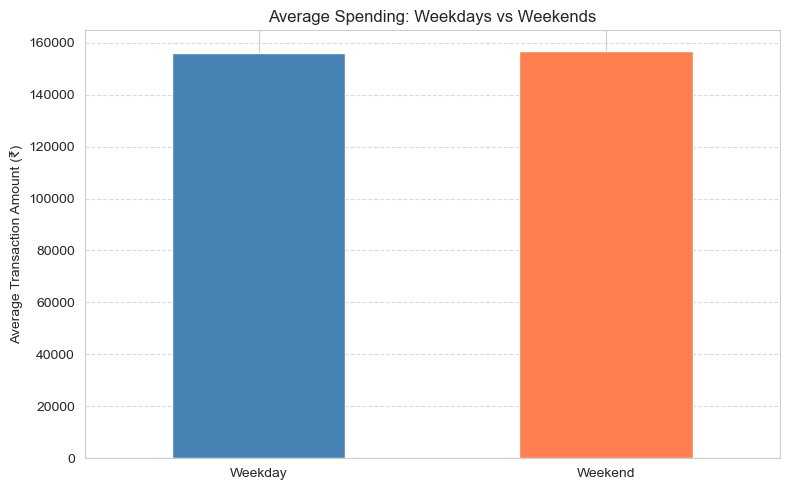

In [512]:
# 1. Ensure Date is datetime and index
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['Weekday'] = df['Date'].dt.day_name()
df['Is_Weekend'] = df['Weekday'].isin(['Saturday', 'Sunday'])

# 2. Average Spend: Weekday vs Weekend
avg_spend = df.groupby('Is_Weekend')['Amount'].mean()

# 3. Plot
plt.figure(figsize=(8, 5))
avg_spend.plot(kind='bar', color=['steelblue', 'coral'])

plt.title("Average Spending: Weekdays vs Weekends")
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], rotation=0)
plt.ylabel("Average Transaction Amount (₹)")
plt.xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 📌 Conclusion: Credit Card Spending Habits in India

This dataset provides a detailed view of **credit card spending behavior** across various Indian cities, capturing trends in transaction types, demographic preferences, and temporal patterns.

### ✅ Key Takeaways

1. **📍 City-Level Insights**  
   - Major cities like **Mumbai, Delhi, and Bengaluru** show the highest total spending.
   - Smaller cities tend to have spending focused on specific categories or card types.

2. **💳 Card Type Trends**  
   - **Credit Cards** are often linked to higher average transaction values.
   - Certain card types dominate specific cities, indicating localized banking trends.

3. **🧾 Expense Type Behavior**  
   - Top expense categories include **Shopping, Travel, and Food**.
   - Categories like **Luxury** or **Electronics** have high-value but low-frequency transactions.

4. **👫 Gender Differences**  
   - Males generally spend more overall, but females lead in categories like **Fashion** and **Grocery**.
   - Spending preferences differ by both **gender and card type**.

5. **📆 Time-Based Trends**  
   - **Festive months** see noticeable spikes in transaction volume and value.
   - **Weekends and month-ends** consistently show higher spending.
   - Both **monthly** and **weekly** trends confirm budgeting cycles and planned purchases.

6. **🌍 Country Analysis**  
   - Though India-focused, the dataset includes some international spending (likely **e-commerce** or **travel-related**).

7. **📊 Statistical and Visual Insights**  
   - Visual tools like boxplots, violin plots, and calendar heatmaps revealed **spending distributions, outliers, and seasonality**.
   - Statistical analysis confirmed significant differences between **weekdays vs weekends** and **card types**.

---

### 🎯 Final Summary

This dataset showcases how **location, gender, card type, and time** influence credit card usage in India. The insights drawn can help financial institutions:

- Better **segment customers**
- **Personalize credit offerings**
- Design **targeted marketing campaigns**

Overall, it reveals rich, actionable patterns in consumer behavior across the credit card ecosystem in India.
